# ４章 データの表現と特徴量エンジニアリング
2019/01/26

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [53]:
data = pd.read_csv("./data_adult/adult.csv",index_col=False,names=["age","work_class","fnlwgt","education","education-num", "marital_status","occupation","relationship","race","gender","capital-gain","captal-loss","hours-per-week","native-country","income"])
# test = pd.read_csv("./data_adult/adult.test.csv",header=None)
# name =  pd.read_csv("./data_adult/adult.names.csv")

In [54]:
data = data[["age","work_class","education", "gender","occupation","hours-per-week","income"]]

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 7 columns):
age               32561 non-null int64
work_class        32561 non-null object
education         32561 non-null object
gender            32561 non-null object
occupation        32561 non-null object
hours-per-week    32561 non-null int64
income            32561 non-null object
dtypes: int64(2), object(5)
memory usage: 1.7+ MB


In [57]:
data.head()

,age,work_class,education,gender,occupation,hours-per-week,income
0,39,State-gov,Bachelors,Male,Adm-clerical,40,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,Exec-managerial,13,<=50K
2,38,Private,HS-grad,Male,Handlers-cleaners,40,<=50K
3,53,Private,11th,Male,Handlers-cleaners,40,<=50K
4,28,Private,Bachelors,Female,Prof-specialty,40,<=50K


In [59]:
data["gender"].value_counts()

 Male      21790
 Female    10771
Name: gender, dtype: int64

In [65]:
data_dummies = pd.get_dummies(data)

In [66]:
data_dummies.columns

Index(['age', 'hours-per-week', 'work_class_ ?', 'work_class_ Federal-gov',
       'work_class_ Local-gov', 'work_class_ Never-worked',
       'work_class_ Private', 'work_class_ Self-emp-inc',
       'work_class_ Self-emp-not-inc', 'work_class_ State-gov',
       'work_class_ Without-pay', 'education_ 10th', 'education_ 11th',
       'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th',
       'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm',
       'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate',
       'education_ HS-grad', 'education_ Masters', 'education_ Preschool',
       'education_ Prof-school', 'education_ Some-college', 'gender_ Female',
       'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Oth

In [68]:
data["work_class"].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: work_class, dtype: int64

In [72]:
data_dummies.values

array([50, 13,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0])

In [85]:
data_dummies.shape

(32561, 46)

In [86]:
data_dummies.columns

Index(['age', 'hours-per-week', 'work_class_ ?', 'work_class_ Federal-gov',
       'work_class_ Local-gov', 'work_class_ Never-worked',
       'work_class_ Private', 'work_class_ Self-emp-inc',
       'work_class_ Self-emp-not-inc', 'work_class_ State-gov',
       'work_class_ Without-pay', 'education_ 10th', 'education_ 11th',
       'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th',
       'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm',
       'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate',
       'education_ HS-grad', 'education_ Masters', 'education_ Preschool',
       'education_ Prof-school', 'education_ Some-college', 'gender_ Female',
       'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Oth

In [82]:
features = data_dummies.ix[:,"age":"occupation_ Transport-moving"]

/Users/okunoryo/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [84]:
features.shape

(32561, 44)

In [88]:
X = features.values
y = data_dummies["income_ >50K"].values
print("X_shape:{} Y_shape:{}".format(X.shape, y.shape))

X_shape:(32561, 44) Y_shape:(32561,)


In [93]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 

In [104]:
train_X,  test_X, train_y, test_y = train_test_split(X,y,random_state=0)

In [105]:
train_y.shape

(24420,)

In [108]:
LR = LogisticRegression()
LR.fit(train_X,train_y)
print("test score:{:.2f}".format(LR.score(test_X,test_y)))

test score:0.81


/Users/okunoryo/.pyenv/versions/3.7.1/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# 切れ目

In [110]:
demo_df = pd.DataFrame({"int_feature":[0,1,2,1],"cat_feature":["sokc","fox","socks","box"]})

In [111]:
demo_df

,int_feature,cat_feature
0,0,sokc
1,1,fox
2,2,socks
3,1,box


In [112]:
pd.get_dummies(demo_df)

,int_feature,cat_feature_box,cat_feature_fox,cat_feature_socks,cat_feature_sokc
0,0,0,0,0,1
1,1,0,1,0,0
2,2,0,0,1,0
3,1,1,0,0,0


In [116]:
#  数値をカテゴリとして扱う
demo_df["int_feature"] = demo_df["int_feature"].astype(str)
pd.get_dummies(demo_df,columns=["int_feature","cat_feature"]) # 数値のカラムを明示的に指定

,int_feature_0,int_feature_1,int_feature_2,cat_feature_box,cat_feature_fox,cat_feature_socks,cat_feature_sokc
0,1,0,0,0,0,0,1
1,0,1,0,0,1,0,0
2,0,0,1,0,0,1,0
3,0,1,0,1,0,0,0


# 4.2 ビニング、離散値、線形モデル,　決定木

In [120]:
import mglearn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [129]:
X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3,3,100, endpoint=False).reshape(-1,1)

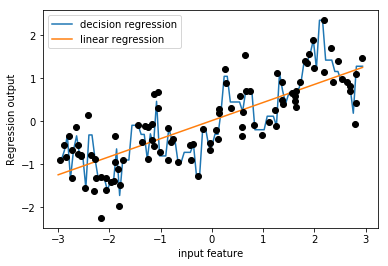

In [155]:
np.linspace(-3,3,100, endpoint=False).reshape(-1,1).shape
reg = DecisionTreeRegressor(min_samples_split=3).fit(X,y) 
plt.plot(line,reg.predict(line), label="decision regression")
reg = LinearRegression().fit(X,y)
plt.plot(line,reg.predict(line),label="linear regression")
plt.plot(X[:,0],y,"o",c="k")
plt.ylabel("Regression output")
plt.xlabel("input feature")
plt.legend(loc="best")

In [157]:
bins = np.linspace(-3,3,11)

In [158]:
bins

array([-3. , -2.4, -1.8, -1.2, -0.6,  0. ,  0.6,  1.2,  1.8,  2.4,  3. ])

In [162]:
which_bin = np.digitize(X, bins=bins)

In [168]:
print("¥n Data point:",X[:5])
print("¥n bin menbersip for data points:",which_bin[:5])

¥n Data point: [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
¥n bin menbersip for data points: [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [169]:
from sklearn.preprocessing import OneHotEncoder

In [173]:
# ワンホットエンコーディング(数値をカテゴリとして扱う)
encoder = OneHotEncoder(sparse=False)
encoder.fit(which_bin)
X_binned = encoder.transform(which_bin)
print(which_bin[:5])
print(X_binned[:5])

[[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


/Users/okunoryo/.pyenv/versions/3.7.1/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [174]:
X_binned.shape

(100, 10)

In [175]:
line_binned = encoder.transform(np.digitize(line,bins=bins))

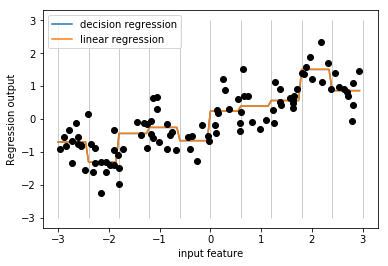

In [188]:
# ビニング後のグラフ
np.linspace(-3,3,100, endpoint=False).reshape(-1,1).shape

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned,y) 
plt.plot(line,reg.predict(line_binned), label="decision regression")

reg = LinearRegression().fit(X_binned,y)
plt.plot(line,reg.predict(line_binned),label="linear regression")

plt.plot(X[:,0],y,"o",c="k")
plt.vlines(bins,-3,3,linewidth=1,alpha=0.2)
plt.ylabel("Regression output")
plt.xlabel("input feature")
plt.legend(loc="best")

まとめ
* biningは線形モデルでは表現力が増すが決定木では既に分割しているデータを学習するので効果はない

----
# 4.3 交互作用と多項式
線形モデルの表現力を強化する手法
* 交互作用特徴量: 
* 多項式特徴量:

In [201]:
X_combined = np.hstack([X,X_binned])
line_combined = np.hstack([line, line_binned])

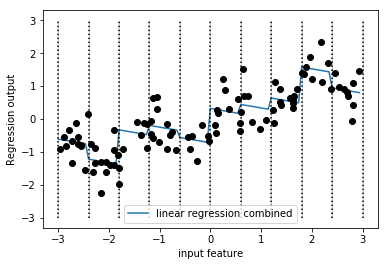

In [209]:
reg = LinearRegression().fit(X_combined,y)
plt.plot(line,reg.predict(line_combined),label="linear regression combined")

for bin in bins:
    plt.plot([bin,bin],[-3,3],":",c="k")
plt.plot(X[:,0],y,"o",c="k")
plt.vlines(bins,-3,3,linewidth=1,alpha=0.2)
plt.ylabel("Regression output")
plt.xlabel("input feature")
plt.legend(loc="best")

In [210]:
bins

array([-3. , -2.4, -1.8, -1.2, -0.6,  0. ,  0.6,  1.2,  1.8,  2.4,  3. ])

In [212]:
X_binned.shape

(100, 10)

In [244]:
X_product = np.hstack([X_binned,(X * X_binned)])
line_product =  np.hstack([line_binned,(line * line_binned)])

In [245]:
X_product.shape

(100, 20)

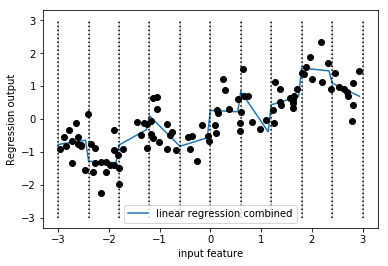

In [246]:
reg = LinearRegression().fit(X_product,y)
plt.plot(line,reg.predict(line_product),label="linear regression combined")

for bin in bins:
    plt.plot([bin,bin],[-3,3],":",c="k")
plt.plot(X[:,0],y,"o",c="k")
plt.vlines(bins,-3,3,linewidth=1,alpha=0.2)
plt.ylabel("Regression output")
plt.xlabel("input feature")
plt.legend(loc="best")

## 多項式特徴量の追加

In [271]:

from sklearn.preprocessing import PolynomialFeatures

In [272]:
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [273]:
X_poly[0]

array([-0.75275929,  0.56664654, -0.42654845,  0.32108831, -0.2417022 ,
        0.18194358, -0.13695972,  0.1030977 , -0.07760775,  0.05841996])

In [274]:
print("Entries of X :\n{}".format(X[:5]))
print("Entries of X_poly :\n{}".format(X_poly[:5]))

Entries of X :
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Entries of X_poly :
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [275]:
poly.get_feature_names()

['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']

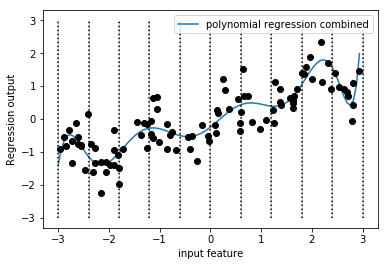

In [278]:
line_poly = poly.transform(line)
reg = LinearRegression().fit(X_poly,y)
plt.plot(line,reg.predict(line_poly),label="polynomial regression combined")

for bin in bins:
    plt.plot([bin,bin],[-3,3],":",c="k")
plt.plot(X[:,0],y,"o",c="k")
plt.vlines(bins,-3,3,linewidth=1,alpha=0.2)
plt.ylabel("Regression output")
plt.xlabel("input feature")
plt.legend(loc="best")

* 少ないデータの範囲では暴れる可能性がある

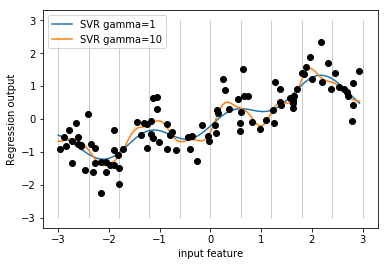

In [277]:
# svmとの比較
from sklearn.svm import SVR
for gamma in [1,10]:
    svr = SVR(gamma=gamma).fit(X,y)
    plt.plot(line,svr.predict(line),label="SVR gamma={}".format(gamma))
plt.plot(X[:,0],y,"o",c="k")
plt.vlines(bins,-3,3,linewidth=1,alpha=0.2)
plt.ylabel("Regression output")
plt.xlabel("input feature")
plt.legend(loc="best")

* SVMのような複雑なモデルを使うと多項式会期と同じように複雑な予測が可能

In [279]:
## boston_houseで試す
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 

In [280]:
boston = load_boston()

In [295]:
X_train,X_test, y_train, y_test = train_test_split(boston.data, boston.target,random_state=0)

In [301]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [317]:
# 交互作用特徴量の追加
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print(X_train.shape)
print(X_train_poly.shape)


(379, 13)
(379, 105)


In [318]:
print(poly.get_feature_names())

['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [329]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled,y_train)
print("交互作用特徴量なし:{:.3f}".format(ridge.score(X_test_scaled,y_test)))
ridge = Ridge().fit(X_train_poly,y_train)
print("交互作用特徴量あり:{:.3f}".format(ridge.score(X_test_poly,y_test)))

交互作用特徴量あり:0.577
交互作用特徴量なし:0.741


* 交互作用特徴量を追加することでridgeのスコアは良くなった

In [332]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled,y_train)
print("交互作用特徴量なし:{:.3f}".format(rf.score(X_test_scaled,y_test)))
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly,y_train)
print("交互作用特徴量あり:{:.3f}".format(rf.score(X_test_poly,y_test)))

交互作用特徴量なし:0.788
交互作用特徴量あり:0.759


* 線形モデルより性能は良いが交互作用特徴量を加えることで精度が下がっている